In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import uniform
import statsmodels.formula.api as smf  
np.random.seed(12578)

### Statistical Distributions
In the demo, we will be evaluating cdf and pdf's, building likelihood and log-likelihood functions, taking random samples and perhaps other statistical operations. We will primarily use the scipy family of distributions. 

Evaluating pdf's and cdf's:

In [2]:
mean = 0
y = 1.5
std = 1
print("PDF value") 
print(norm(mean,std).pdf(y))
print("CDF value")
print(norm(mean,std).cdf(y))

PDF value
0.12951759566589174
CDF value
0.9331927987311419


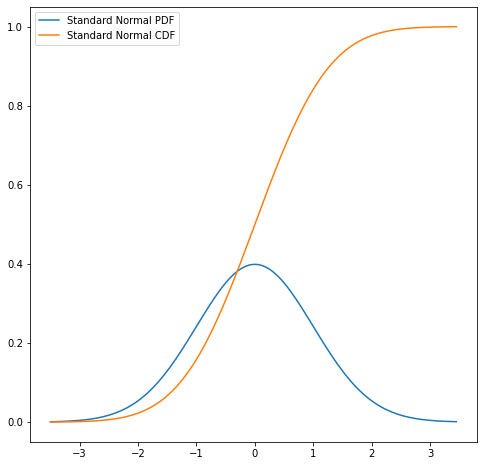

In [3]:
# use these for some plots
y = np.arange(-3.5,3.5,.05)

pdf_cdf_values = np.zeros((y.shape[0],3))
pdf_cdf_values[:,0] = y
pdf_cdf_values[:,1] = norm(mean,std).pdf(y)
pdf_cdf_values[:,2] = norm(mean,std).cdf(y)

   
plt.figure(figsize=(8,8))
plt.plot(pdf_cdf_values[:,0],pdf_cdf_values[:,1],label="Standard Normal PDF")
plt.plot(pdf_cdf_values[:,0],pdf_cdf_values[:,2],label="Standard Normal CDF")
plt.legend(loc='upper left')
plt.show()

### Random Variables
Let's draw some random numbers from the normal distribution. This time, instead of using mean 0 and standard deviation of 1, let's assume the distribution is centered at 10 with a standard deviation of 2. Draw 100 random variables:

In [4]:
mean = 10
std = 2
N = 100
y = norm(mean,std).rvs(N)
print(y)

[10.41686472  6.72611306  9.20348461 11.67079106 14.15377413  9.78287809
  9.83408784  7.83980489  6.21018425 12.23916019  9.45461662 10.63889929
  6.58849774  9.96389407  7.96884601 10.42344446  9.45020002 12.93908039
 10.11263851  7.98512175 11.87855743  8.42314993  9.09156988 10.90302077
  7.3771751   7.03648814 10.54189927 14.09773549  9.19448907 12.93931697
 10.49027688  9.22235715  5.73973794 11.20407959  9.82559841  8.78135374
  5.69799647 13.62382972  8.26666461 11.31502973  9.24674708  9.09477411
 12.31188227 11.20571449 12.89555143 10.90910426 12.65193488 10.73500682
  9.1105223  12.11264092  9.56369209 11.47744907  9.81428745  8.91313828
 11.91558726  8.0820239   7.91563515 11.06442387  5.56267745  6.09232808
 10.34458283  6.64327682  7.85285525  7.73673878  9.12125366  7.71302735
  9.56898416  8.09889655  9.40693208 12.77956292 13.20303638 10.8201574
 10.30760335 11.8707502  12.27990302  9.86902746  6.13998553  9.44624862
 10.44409674  9.52436141  9.05273226 12.713509   10.

9.777465558583781
2.037619083453264


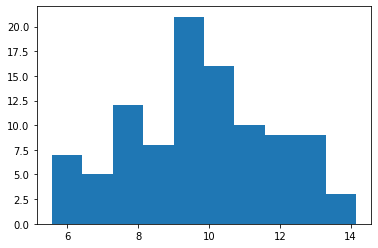

In [5]:
##Stats & plots
print(np.mean(y))
print(np.std(y))
plt.hist(y,bins=10)
plt.show()

## Frequentist example
### Likelihood functions
Suppose the values y are observed and we want to calculate the likelihood of y given a mean for each of the 100 observations in y. Even though we know the mean above should be 10, let's calculate the likelihood of y given a mean of 10.3 and a standard deviation of 2 assuming y is distributed normal. Note these are simply pdf values for each datapoint:

$L_i(y_i|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y_i-\mu)^2}{2\sigma^2}}$

In [6]:
norm(10.3,2).pdf(y)

array([0.1991309 , 0.04041036, 0.17163606, 0.15771444, 0.03116273,
       0.19291365, 0.19413141, 0.09360648, 0.02465169, 0.12466458,
       0.18242433, 0.19662787, 0.03565051, 0.19667422, 0.10112776,
       0.19909155, 0.18225368, 0.08351919, 0.19859777, 0.10208818,
       0.14608507, 0.12842548, 0.16618999, 0.1906073 , 0.06856666,
       0.05268632, 0.19801745, 0.03287854, 0.17121161, 0.08350615,
       0.19857044, 0.17251864, 0.01482286, 0.18009772, 0.19393779,
       0.14951306, 0.01413092, 0.05013348, 0.118969  , 0.17536752,
       0.17364307, 0.16635073, 0.12026658, 0.18003112, 0.0859322 ,
       0.19043169, 0.09990501, 0.19480824, 0.16713676, 0.13228533,
       0.18640112, 0.16773264, 0.19367471, 0.15684317, 0.14394111,
       0.1078501 , 0.09800516, 0.18542057, 0.012066  , 0.02181519,
       0.19942159, 0.03749533, 0.09435883, 0.08774028, 0.16766856,
       0.0864111 , 0.18658214, 0.10885999, 0.18054378, 0.0924937 ,
       0.0695619 , 0.19283774, 0.1994697 , 0.14653474, 0.12220

We can also easily calculate the joint likelihood. This is

In [7]:
norm(10.3,2).pdf(y).prod()

9.256632406264863e-95

For computational advantages, we usually, work with log likelihoods

In [8]:
norm(10.3,2).logpdf(y).sum()

-216.52024352295027

Let's visualize the log-likelihood function

In [9]:
mu_candidate = np.arange(7,13,0.05) # plot likelihood and log-likelihood in this range

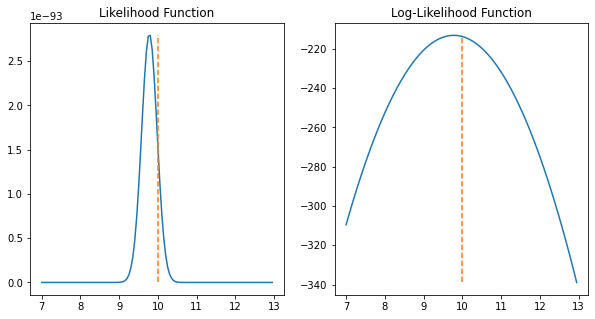

In [10]:
like_loglike_values = np.zeros((mu_candidate.shape[0],3))

row_index=0
for i in mu_candidate:
    like_loglike_values[row_index,0] = i
    like_loglike_values[row_index,1] = norm(i,2).pdf(y).prod()
    like_loglike_values[row_index,2] = norm(i,2).logpdf(y).sum()
    row_index+=1

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Likelihood Function')
plt.plot(like_loglike_values[:,0],like_loglike_values[:,1],label="Likelihood Function")
plt.plot([10,10],[min(like_loglike_values[:,1]),max(like_loglike_values[:,1])],'--')
plt.subplot(122)
plt.plot(like_loglike_values[:,0],like_loglike_values[:,2],label="Log-Likelihood Function")
plt.plot([10,10],[min(like_loglike_values[:,2]),max(like_loglike_values[:,2])],'--')
plt.title('Log-Likelihood Function')
plt.show()

In [11]:
ind1 = np.argmax(like_loglike_values[:,1])
print(mu_candidate[ind1],'Estimation from graph (MLE)')
print(np.mean(y),'E(y)')
##Note the difference is just numerical issues, in theory, MLE estimate of \mu is the average of y

9.79999999999999 Estimation from graph (MLE)
9.777465558583781 E(y)


## Bayesian example

Let's examine the posterior, $Prob(\mathbf{y}|\theta), Prob(\theta)$ and see how priors influence the posterior probabilities.  Suppose we have an ultra-simple model: we have only have 1 observation on y :  

* You observe y=7 and know the standard deviation for y is 1.
* You also have strong beliefs based on experience, that the average is 5 with a standard deviation of 2. Denote these beliefs (hyperparameters) as $\mu_0$ and $\sigma_0$.

Letting both $Prob(\mathbf{y}|\theta,\mathbf{x})$ and $Prob(\theta|\mathbf{x}))$ be normal pdf's, we have the likelihood:
$$
Prob(\mathbf{y}|\mu) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y - \mu)^2}{2\sigma^2}} = \frac{1}{\sqrt{2\pi}} e^{-\frac{(y - \mu)^2}{2}}
$$

and the prior:
$$
P(\mu) = \frac{1}{\sqrt{2\pi \sigma_0^2}} e^{-\frac{(\mu - \mu_0)^2}{2 \sigma_0^2}} = \frac{1}{\sqrt{2\pi 4}} e^{-\frac{(\mu - 5)^2}{2 \times 4}}
$$

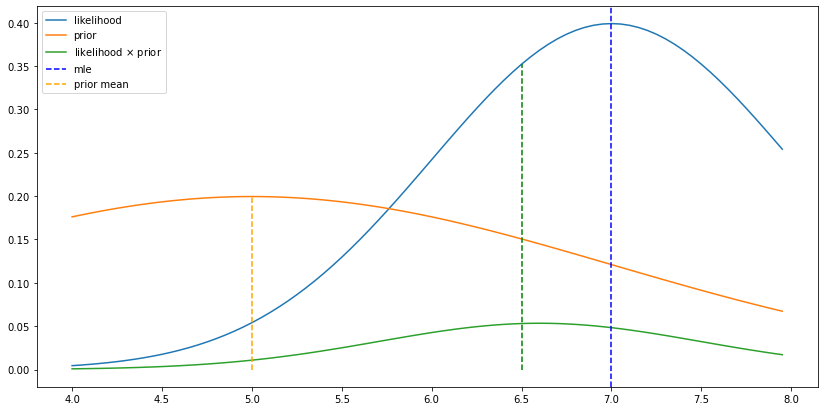

In [15]:
# observed data
y = 7
# std deviation of y
sigma = 1

# prior hyperparameters
mu_0 = 5
sigma_0 = 2 #(this is our prior on std dev of mu_0)


# gen some data along the support of mu and plot likelihood:

mu_plot = np.arange(4,8,.05)

likelihood = norm(mu_plot,sigma).pdf(y)
prior = norm(mu_0,sigma_0).pdf(mu_plot)

plt.figure(figsize=(14,7))
plt.plot(mu_plot,likelihood,label='likelihood')
plt.plot(mu_plot,prior,label='prior')
plt.plot(mu_plot,likelihood*prior,label='likelihood $\\times$ prior')

# plot the mle estimate
plt.axvline(y,c='b',linestyle='--', label='mle')
plt.plot([5,5],[0,norm(mu_0,sigma_0).pdf(mu_0)],c='orange',linestyle='--', label='prior mean')
plt.plot([6.5,6.5],[0,norm(6.5,sigma).pdf(y)],c='g',linestyle='--')
plt.legend(loc='upper left')
plt.show()

### Let's continue the discussion on 10/100 variables
If you have a strong belief that the average is $\mu_0$ with a standard deviation of 2. Denote these beliefs (hyperparameters) as  𝜇0  and  𝜎0 .

[ 7.2037985   9.69905471 10.48670414 10.01252324  7.63610241  9.41583759
 10.71706301 11.09394164  8.93341693 10.00201529  7.91697235  9.66959579
 10.11055516  9.36291034  7.54352282  8.59609872 12.00749762  8.53877827
  7.0582428   9.03489748 12.79496679  7.73334939 12.54456541  9.90933738
  7.89731308 13.03471973  9.72465785  7.39509008  7.85622946 12.14147897
 10.3865752  13.57817788  9.63900378 10.61878349  9.62476923 11.32393737
  7.61538109 12.93630754 11.20855385  9.84631836  9.731253    7.89703013
  9.0030571  10.72133159  5.95092487  9.85830847 10.48707614 12.9753424
 12.18148802 11.41607856  8.91736584  7.9959382  12.3197256  11.76101352
  9.53030866 11.56009272  9.38469112 10.03486074 10.33998121  9.52375061
  7.55111533  8.82936421  3.83601061  9.40530194 10.52431572 14.61283287
  7.59313463 11.74289715 11.026986    7.50572595 12.74787808  9.83816783
 11.12732875  9.59545546  9.52073212  9.89173085  6.57674645 10.62866912
  8.58954489  9.37541712 10.12124034 11.38650055 13.

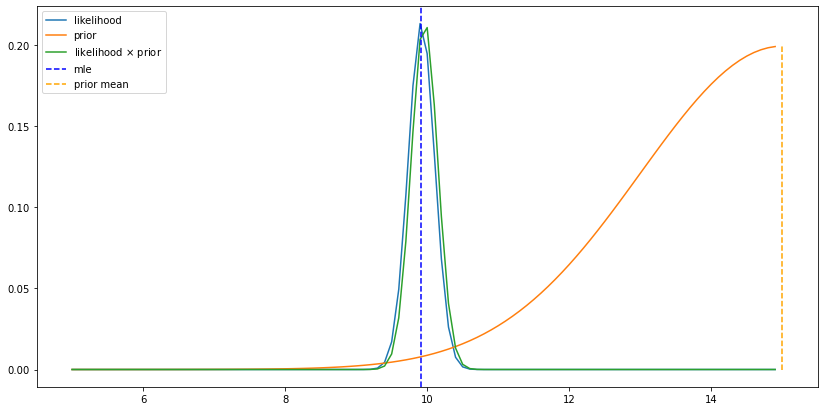

In [20]:
mean = 10
std = 2
N = 100
# N = 10

# observed data
y = norm(mean,std).rvs(N)
print(y,'average',np.mean(y))
# std deviation of y
sigma = np.std(y)

# prior hyperparameters
mu_0 = 15
sigma_0 = 2 #(this is our prior on std dev of mu_0)
# 

# gen some data along the support of mu and plot likelihood:
mu_plot = np.arange(5,15,0.1)
likelihood = [norm(m,sigma).pdf(y).prod() for m in mu_plot]
likelihood = likelihood/sum(likelihood) #normalize
prior = norm(mu_0,sigma_0).pdf(mu_plot)

plt.figure(figsize=(14,7))
plt.plot(mu_plot,likelihood,label='likelihood')
plt.plot(mu_plot,prior,label='prior')
plt.plot(mu_plot,likelihood*prior/np.sum(likelihood*prior),label='likelihood $\\times$ prior')

# plot the mle estimate
plt.axvline(np.mean(y),c='b',linestyle='--', label='mle')
plt.plot([mu_0,mu_0],[0,norm(mu_0,sigma_0).pdf(mu_0)],c='orange',linestyle='--', label='prior mean')
#plt.plot([bayes_guess,bayes_guess],[0,norm(bayes_guess,sigma).pdf(y)],c='k',linestyle='--')
plt.legend(loc='upper left')
plt.show()